In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
#reading the csv
diabetic_data=pd.read_csv('diabetes.csv')

In [3]:
diabetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetic_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Visulaization


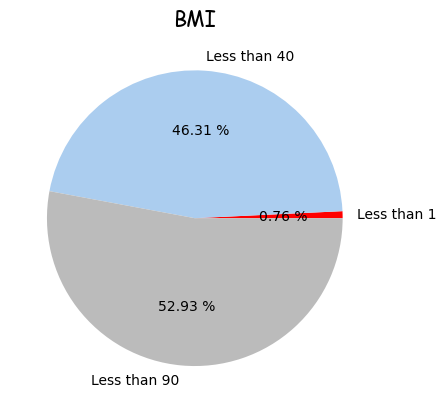

In [7]:
first=diabetic_data.loc[diabetic_data['BMI']<=1.0].count()[0]
second=diabetic_data.loc[diabetic_data["BMI"]<=40.0].count()[0]
third=diabetic_data.loc[diabetic_data["BMI"]<=90.0].count()[0]
label=["Less than 1",'Less than 40','Less than 90']
color=['red','#abcdef','#bbbbbb']
#for percentage sign we need two percentage symbol
plt.pie([first,second,third],labels=label,colors=color,autopct='%.2f %%')#autopct mean auto percentege where it print only the starting two decimal value 
plt.title('BMI',fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


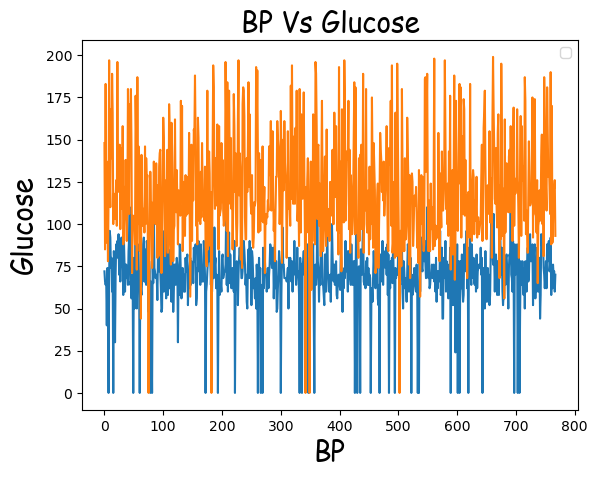

In [8]:
plt.plot(diabetic_data[["BloodPressure","Glucose"]])
plt.title("BP Vs Glucose",fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel('BP',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.ylabel('Glucose',fontdict={'fontname':'Comic Sans MS','fontsize':20})

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


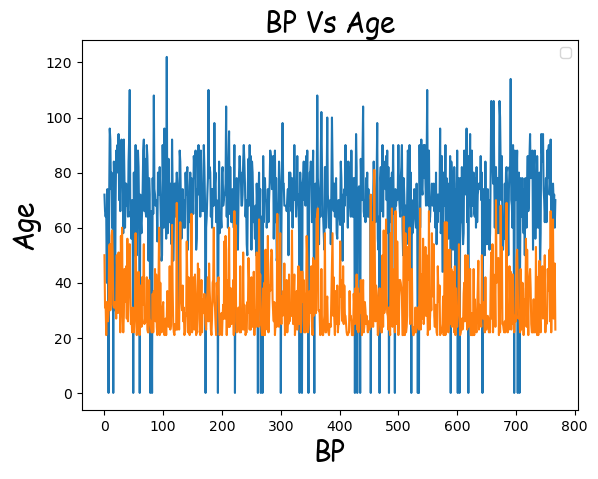

In [9]:
plt.plot(diabetic_data[["BloodPressure","Age"]])
plt.title("BP Vs Age",fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel('BP',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.ylabel('Age',fontdict={'fontname':'Comic Sans MS','fontsize':20})

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


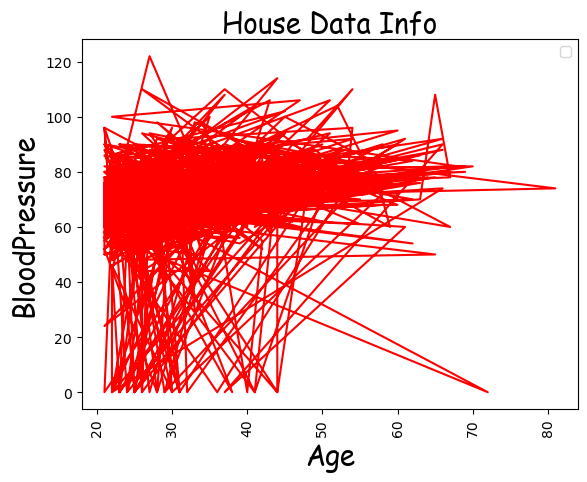

In [10]:
plt.plot(diabetic_data.Age,diabetic_data.BloodPressure,color='red')
plt.title("House Data Info",fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel('Age',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.ylabel('BloodPressure',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Data Cleaning

In [11]:
diabetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetic_data=diabetic_data.drop(columns='SkinThickness',axis=1)
diabetic_data=diabetic_data.rename({"BloodPressure":"BP"},axis=1)
diabetic_data.head()

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [13]:
X=diabetic_data.drop(columns='Outcome',axis=1)
Y=diabetic_data['Outcome']

# Spliting the Data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)#if we didnt apply stratify then all the x_test will contain 0 in it 
#the random state is applied for split the data into specicfic way and for the accuracy purpose

In [15]:
#to find the shape of training and test data
print(X.shape,X_train.shape,X_test.shape)

(768, 7) (614, 7) (154, 7)


# Using logistic regression


### Model Training

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression model with training data
model.fit(X_train,Y_train)

## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [17]:
#training the logistic regression model with training data
model.fit(X_train,Y_train)

DecisionTreeClassifier()

# Model Evaluation

### Finding Accuracy of model

In [18]:
#accuracy of training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [19]:
print('Accuracy of training dataset:',training_data_accuracy)

Accuracy of training dataset: 1.0


# Building a Predictive System

In [ ]:
X.head()

In [24]:
def make_prediction():
    pregnancies = int(input("Enter the number of pregnancies: "))
    glucose = float(input("Enter the glucose level: "))
    blood_pressure = float(input("Enter the blood pressure: "))
    insulin = float(input("Enter the insulin level: "))
    bmi = float(input("Enter the BMI: "))
    diabetes_pedigree = float(input("Enter the diabetes pedigree function: "))
    age = int(input("Enter the age: "))
    data = pd.DataFrame([[pregnancies, glucose, blood_pressure, insulin, bmi, diabetes_pedigree, age]],
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age'])
    prediction = model.predict(data)
    if prediction[0] == 0:
        print("The model predicts that the person does not have diabetes.")
    else:
        print("The model predicts that the person has diabetes.")

In [25]:
make_prediction()

Enter the number of pregnancies: 8
Enter the glucose level: 183
Enter the blood pressure: 64
Enter the insulin level: 0
Enter the BMI: 23.3
Enter the diabetes pedigree function: 0.672
Enter the age: 32
The model predicts that the person has diabetes.


E:\ml\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BloodPressure
Feature names seen at fit time, yet now missing:
- BP

  warnings.warn(message, FutureWarning)


# to change the input in numpy and predict

In [24]:
input_data=(8,183,64,0,23.3,0.672,32)
 
#change the input tuple data into numpy data
input_data_numpy=np.asarray(input_data)
 
#reshape the numpy array as we are predicting only for one input or on instance
input_data_reshape=input_data_numpy.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)
 
if (prediction[0]==0):
    print("the person has diabetics")
else:
    print("the person has no diabetics")

[1]
the person has no diabetics


E:\ml\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
import joblib

joblib.dump(model,'Diabetic Cheaker.joblib')

['Diabetic Cheaker.joblib']

In [ ]:
files